## Basic Machine Learning Modeling (Logistic Regression)

### Project Overview

This proejct explores the Titanic dataset to identify factors that influence survival. After performing exploratory data analysis (EDA), we now proceed to build a baseline machine learning model using Logistic Regression to predict passenger survival. 

---

### Objective
- Train a **Logistic Regression** model on the Titanic dataset
- Evaluate model performance using **accuracy**, **precision**, and **recall**
- Perform basic preprocessing including column selection, missing value handling, and categorical encoding

--- 

### What We Will Do
1. Load and inspect the dataset ('train.csv')
2. Drop irrelevant columns and handle missing values 
3. Encode categorical variables (e.g., Sex, Embarked)
4. Split the data into training and test sets
5. Train a logistic regression model
6. Evaluate performance with classification metrics

---

### Why Logistic Regression? 

Logistic Regression is a simple interpretable algorithm for binary classification problems. 
In this case, the target variable 'Survived' contains two classes:
- `0` = Did not survive
- `1` = Survived 

This makes it an ideal starting point for building predictive models on this dataset.

---

In [1]:
# import libraries & load data
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
# Load the dataset
df = pd.read_csv('../data/train.csv')

# Quick check
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Drop unnecessary columns
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Drop rows with missing values
df = df.dropna()

# Convert categorical variables to numeric using get_dummies
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Separate features and target
X = df.drop('Survived', axis=1)
y = df['Survived']


In [9]:
# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [10]:
# Create and train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [11]:
# Accuracy score 
print("Accuracy : ", accuracy_score(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred))

Accuracy :  0.7972027972027972
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        80
           1       0.85      0.65      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143

Confusion Matrix : 
 [[73  7]
 [22 41]]


## Confusion Matrix

### What is Confusion Matrix? 
A **confusion matrix** is a table used to evaluate the performance of a classification model. 
For binary classification like the Titanic dataset (`Survived` = 0 or 1), the structure is:

|                     | Predicted: 0 (Not Survived) | Predicted: 1 (Survived) |
|---------------------|-----------------------------|--------------------------|
| **Actual: 0** (Died)     | True Negative (TN)             | False Positive (FP)        |
| **Actual: 1** (Survived) | False Negative (FN)            | True Positive (TP)         |

---

### Terminology 

- **True Positive (TP)** : Correctly predicted survival 
- **False Positive (FP)** : Predicted survival but actually died 
- **True Negative (TN)** : Correctly predicted death 
- **False Negative (FN)** : Predicted death but actually survived 

In [17]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

/var/folders/0t/bk4682r91356qc2k04w5dcs80000gn/T/ipykernel_28112/3093239885.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', palette='pastel')
/opt/anaconda3/envs/transformers_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128674 (\N{SHIP}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


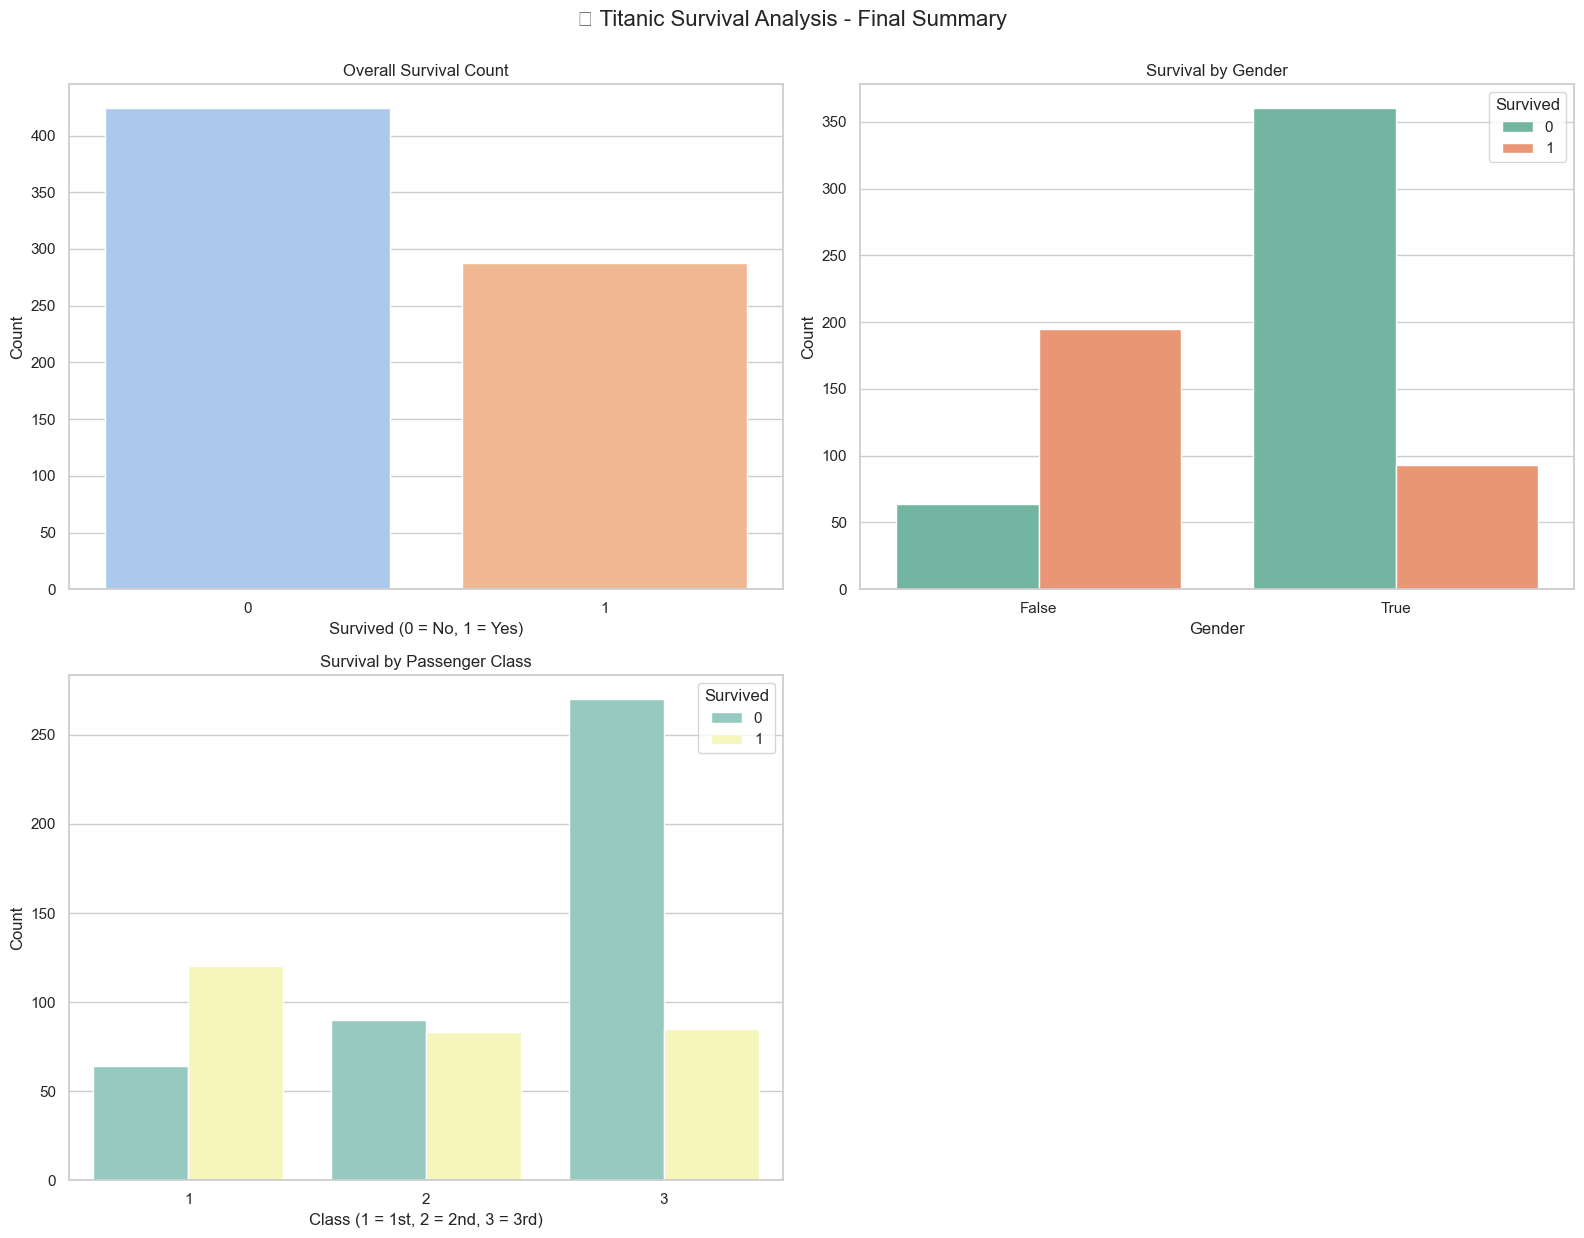

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='whitegrid')
plt.figure(figsize=(16, 12))

# --- Plot 1: Survival Count ---
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Survived', palette='pastel')
plt.title('Overall Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')

# --- Plot 2: Survival by Sex ---
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Sex_male', hue='Survived', palette='Set2')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# --- Plot 3: Survival by Passenger Class ---
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set3')
plt.title('Survival by Passenger Class')
plt.xlabel('Class (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.ylabel('Count')


plt.tight_layout()
plt.suptitle("🚢 Titanic Survival Analysis - Final Summary", fontsize=16, y=1.03)
plt.show()